## Data Selection and EDA

### Disney Park Reviews Narrative

The focus point of my data mining project is on the Disney Theme Parks and the reviews they receive throughout guests visits. As this model will be used to break down guests’ reviews using Data Visualizations using matplotlib and seaborn that will create graphs that focus on different aspects of the reviews Disney has received. Next this project will focus on data preparation and modification to the data set by manipulating the data set to drop unneeded values, while also researching into missing values that are needed, and editing the given reviews to remove unneeded stop words, punctuation, and more. Last this report will be split into training and test set that will allow users to create regression that will show the shape, accuracy, precision, and recall of our regression regarding the reviews evaluated. As the problem this model will address is the mass amounts of reviews Disney receives a day, by using dummy variables to split out the different parks to determine where these reviews are coming from, which willshow us what parks / areas the reviews are referencing, are these review negative or positive with sentiment analysis, and determine the steps the company will need to take to improve on their guest’s feedback. By streamlining this process we will be able to split out the different parks that are moved to dummy variables which will allow corporate to streamline which parks require workers to respond and or even call guests to see what they can do to better the guests experience. As these reviews can determine whether some new guests will come and if existing guests that left a review will return. In the end Disney is a theme park that is focused on supplying their guests with a memorable experience that will spark into a reoccurring customer that comes back for years to come.  

In [380]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

[nltk_data] Downloading package wordnet to /Users/Robyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Importing the Data

In [234]:
# I will use pandas to pull the data to create a data frame to work from
Disney_Data = pd.read_csv('DisneylandReviews.csv')
Disney_Data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


### Reviewing the Data Set

In [235]:
# Next I will display the dimensions of the disney dataframe
Disney_Data.shape

(42656, 6)

As seen above we see that we have six columns with 42,656 rows of data.

In [236]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


As seen above we see that our Review_ID and Rating are the int64 Dtype. While the remaining variables are object Dtype.

In [237]:
# As seen above in the dataframe we see that the Year_Month variable has missing data in the last five rows. 
# Which we will use pandas to read the data again and specify the data with NA values as missing.
Disney_Data = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1', na_values = 'missing')
Disney_Data.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,NaN,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [238]:
# Next I will check and what variables have NA values and what percentage of the variable is NA
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
dtype: float64

As seen above we see that the Year_Month variable is the only variable with NA data and only being 6% of all the data. Due to the low rate we will keep these NAs as we are looking to analyse the review variable data.

### Searching for Duplicate Review IDs

In [239]:
# Next I will use the value_count to see if the data set has duplicate
# Reviews for the same id number.
Disney_Data.Review_ID.value_counts().head(25)

166787525    2
129231609    2
164862064    2
121570980    2
129214104    2
121580686    2
121615136    2
166784597    2
166787635    2
129207323    2
121568004    2
166730734    2
121586148    2
121578357    2
166753649    2
226905150    2
166754595    2
164830205    2
121615246    2
168489234    2
437267056    1
180482699    1
157444688    1
124676711    1
172510999    1
Name: Review_ID, dtype: int64

In [240]:
# Next I will pull up one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 166753649]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24019,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24027,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


In [241]:
# I will pull up another one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 164862064]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong


As seen above we can see that the duplicate review_text is the same so I will drop the duplicates

In [242]:
# I will now use drop to drop my duplicate Review_IDs and keep the first
Disney_Data.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
Disney_Data.shape

(42636, 6)

As seen above we can see in our shape that we removed several lines. 

### Seperating the Year_Month Variable

In [243]:
## I will use str.split to split my month and year variable to 
# create seperate variable.
Disney_Date = Disney_Data['Year_Month'].str.split('-')
Disney_Date

0        [2019, 4]
1        [2019, 5]
2        [2019, 4]
3        [2019, 4]
4        [2019, 4]
           ...    
42651          NaN
42652          NaN
42653          NaN
42654          NaN
42655          NaN
Name: Year_Month, Length: 42636, dtype: object

In [244]:
# Next I will create two new variables for year and month through the use of str
Disney_Data['Year'] = Disney_Date.str[0]
Disney_Data['Month'] = Disney_Date.str[1]

In [245]:
# Next I will use head to view the first five columns of the 
# updated data set variables.
Disney_Data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


As seen above we see that the two new variables year and month have been created. Which can be used in the graphical analysis to further review

### Graphical Analysis 

### Data Visualization 1: Bar Chart - Disney Review Ratings

In [246]:
# First I will create a count of the dataframes ratings to 
# determine the value of each rating. 
rate_value = Disney_Data.Rating.value_counts()

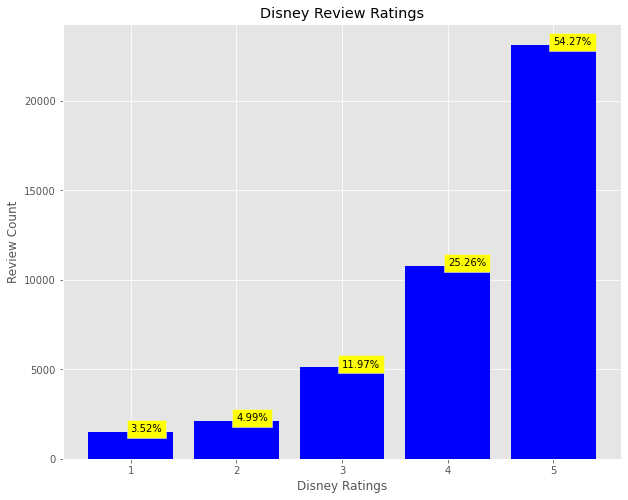

In [247]:
# I will use plt to create a data visualization that will 
# show the  Number of Reviews vs the ratings they fall within
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 8))
    plt.bar(rate_value.index, rate_value.values, color='blue')
    for rating, value in zip(rate_value.index, rate_value.values):
        plt.text(rating, value, str(round(value/sum(rate_value.values)*100, 2))+'%', 
                color='black', bbox=dict(facecolor='yellow'))
    plt.title('Disney Review Ratings')
    plt.xlabel('Disney Ratings')
    plt.ylabel('Review Count')
    plt.yticks(np.arange(0, 25000, 5000))

As seen above we see that are reviews scale range from 1 to 5 with 5 being the highest rating and 1 being the worst. In this graph we see that more than 50% of Disneys ratings are 5 star ratings while Disney has less than 10% ratings for both 1 and 2 star ratings. 

### Data Visualization 2: Seaborn cat bar plot  - Ratings by Year for Each Park Branch

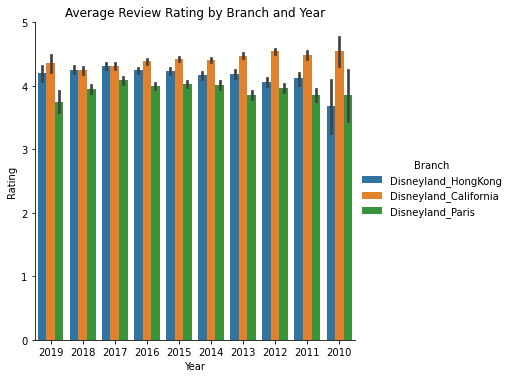

In [248]:
sns.catplot(data = Disney_Data, x = 'Year', y = 'Rating', hue = 'Branch', kind = "bar").set(title='Average Review Rating by Branch and Year')

The seaborn cat bar plot above shows that the average rating for each branch and or park is staying between three and four star average ratings. Which is great for the parks but as we do see that HongKongs parks has seen dips in 2010 but steadily rises throughout the years. While DisneyLand California maintained a average rating above 4 throughout the years.

### Data Visualization 3: Horizontal Bar Chart - Average Rating Based on Park Location

In [249]:
# First I will create a rating value for each park location
Park_rating = Disney_Data.groupby('Branch').agg({'Rating': 'mean'}).unstack()['Rating']

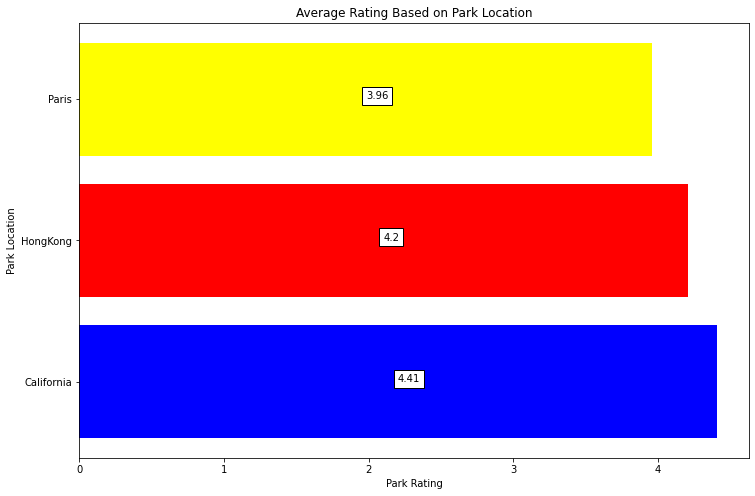

In [250]:
# I will now create a scatter plot that shows the average rate 
# for each park location through the use of plt and a for statement.
plt.figure(figsize=(12, 8))
plt.barh([branch[11:] for branch in Park_rating.index], 
         Park_rating.values, color=['blue', 'red', 'yellow'])
for value, park in zip(Park_rating.values, [branch[11:] for branch in Park_rating.index]):
    plt.text(value/2, park, round(value, 2), bbox=dict(facecolor='white'))
plt.xlabel('Park Rating')
plt.ylabel('Park Location')
plt.title('Average Rating Based on Park Location')
plt.xticks(np.arange(0, 5))
plt.show()

Seen above in the horizontal bar graph we see that Californa had the highest rating out of the three parks with a 4.41 and Paris in last with a average rating of 3.98 out of 5. These score can be jsutified as California is on of Disneys main parks so they tend to have better customer service and reviews due to the fact that the castmembers at that location are trained by individuals that have been with the company since it started. 

### Data Visualization 4: Seaborn Count Plot - Review Ratings Per Year

[Text(0.5, 1.0, 'Count Per Ratings Per Year')]

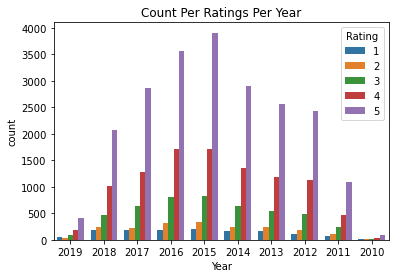

In [251]:
sns.countplot(data = Disney_Data, x = 'Year', hue = 'Rating').set(title='Count Per Ratings Per Year')

The seaborn countplot above shows that as the years go from 2010 / 2011 to 2015 we see a rise in reviews for the theme parks. But as we go on from 2015 to 2019 we see a decline in reviews. Which I found verey interesting as I believe Disney would still be receiving alot if not more reviews btu this could be due to incomplete data.

### Conclusion

The graphical analysis of this project has shown me that the overall percentage of reviews had 54.27% with five-star reviews and less than 10% with one- or two-star ratings. As this shows Disney for the most part is receiving positive feedback from their guests. But for the 10% that is not happy with their experience how is Disney dealing with this review rating and or do they even realize they have these low reviews? As in the “Ratings by Year for Each Park” cat bar plot we see that Disneyland Paris is the park that is receiving the lowest review ratings throughout the years. Which could be due to issues stemming from tat park alone that needs to be addressed by workers in the United States and or Disneyland California. While the average rating for Disneyland Paris is 3.98 while Hong Kong and California parks sit at a 4.22% and 4.41%. As this project continues we will dive deeper into the reviews given by guests and determine if the reviews reflect the ratings they received. 

## Data Preparation

The data preparation process that is used for my Disney review data started by checking the data type of my variables and checking for missing values within my variables. Once my missing values are identified I will determine how to update these missing values. The missing values I had came from my Year_Month variable so I decide to split my data into two variables one that focused on the year and one on the month. Once this is done the original variable will be dropped and front fill “ffill” will be used to replace missing values. Next some extraction steps I will take to clean up my review’s variable are the removal of punctuation, lowercase, number removal, creating tokens, and the removal of stop words. While also engineering new useful features such as creating polarity for the reviews to determine if they are positive, negative, or neutral. As the use of sentiment intensity analysis allows vadar rating and polarity to be calculated on the review data. Last the use of dummies can be used to create new variables for the parks to show the different review ratings for each parks. 

### Drop any features that are not useful for your model building and explain why they are not useful.

In [252]:
# First I will pull up my data and view the current dataframe
Disney_Data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [253]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42636 entries, 0 to 42655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42636 non-null  int64 
 1   Rating             42636 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  42636 non-null  object
 4   Review_Text        42636 non-null  object
 5   Branch             42636 non-null  object
 6   Year               40023 non-null  object
 7   Month              40023 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.9+ MB


As seen above the data shows that the dtype for the review_ID and Rating variables are int64 and all the remaining variables are objects.

In [254]:
# Next I will check and what variables have NA values and what percentage of the variable is NA
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061286
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
Year                 0.061286
Month                0.061286
dtype: float64

As seen above we see that the Year_Month, Year, and Month variables are the only variables with NA's data and only being 6% of all the data. I will first drop the Year_Month variable due to the fact that I have created new variables for year and month but seperate. 

### Deal with missing data (do not just drop rows or columns without justifying this).

In [255]:
# I will first drop my Year_Month variable being that I seperated
# them and created new ones  
Disney_Data.drop(columns =["Year_Month"], inplace = True)
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [256]:
# I will now use ffill to fill my missing data for month and year variables
# as the variables for the month and year would be similar to the one bellow 
Disney_Data = Disney_Data.fillna(method="ffill")

In [257]:
# Next I will check and make sure that all values are filled and are not missing any data
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.0
Rating               0.0
Reviewer_Location    0.0
Review_Text          0.0
Branch               0.0
Year                 0.0
Month                0.0
dtype: float64

In [258]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42636 entries, 0 to 42655
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42636 non-null  int64 
 1   Rating             42636 non-null  int64 
 2   Reviewer_Location  42636 non-null  object
 3   Review_Text        42636 non-null  object
 4   Branch             42636 non-null  object
 5   Year               42636 non-null  object
 6   Month              42636 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


As seen above the data frame no longer has any missing data and the Dtypes have been the same. 

### Perform any data extraction/selection steps and transform features if necessary.

In [259]:
# I will first remove the punctuation from my Review_Text variable 
# to start the cleaning process of my disney reviews
def punc_removal(text):
    text = " ".join([word.strip(string.punctuation) for word in text.split(" ")])
    return text
Disney_Data['Review_update'] = Disney_Data['Review_Text'].apply(punc_removal)

In [260]:
# Next I will transform my Review_update text to lowercase 
# through the use of lambda, apply, and lower
Disney_Data['Review_update']= Disney_Data['Review_update'].apply(lambda x: x.lower())

In [261]:
# Next I will remove the numbers that are imbedded in the reviews by using isdigit and apply
def number_removal(text):
    text = "".join([word for word in text if not any(c.isdigit() for c in word)])
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(number_removal)

In [262]:
# I will now convert my Review_update variable with split to create tokens 
def token(text):
    text = text.split()
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(token)

In [263]:
# Next I will set my stopwords to english and string my puncuation 
# While setting Disney as a word that I do not want edited by the stopwords
stop_words = set(stopwords.words('english'))
keep_names = ['disney']
punc = string.punctuation

In [264]:
# Next I will remove the stopwords from my Review_update
def stopword_removal(text): 
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop_words and x not in keep_names and x not in punc] 
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(stopword_removal)

In [266]:
# Next I will convert the words in the text to their base word with the use of WordNetLemmatizer
def lemmatize(text):
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(lemmatize)

In [267]:
# I will Join my Review_update variable values through the use of join
def review_join(text):
    text = " ".join(text)
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(review_join)

The data extraction that was completed above was for punctuation, lowercase, number removal, creating tokens, and the removal of stop words. Which will condence the review and make it easier to determine if the review is positive, negative, or neutral.

### Engineer new useful features.

In [268]:
# Next I will view my updated data frame to see my original and 
# new variable to further evaluate my dataframe
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...


In [269]:
# Next I create a new variable for polarity of my Rating variable
Disney_Data['Review_Polarity'] = Disney_Data['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...,Positive


Above the use of lamba to determine the polarity of the rating for the reviews was determining if the value was Positive, Negative, or Neutral.

In [217]:
pip install vaderSentiment

You should consider upgrading via the '/Users/Robyn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [218]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [270]:
# Last I will calculat the vader by using the SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
vader = []

for i in Disney_Data['Review_update']:
    score = analyzer.polarity_scores(i)
    vader.append(score['compound'])
Disney_Data['Vader_rating'] = vader

In [271]:
# I will also determine the rating of each value by setting the vader to positive, negative, or neutral
Disney_Data['Vader_polarity'] = Disney_Data['Vader_rating'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive,0.7889,Positive
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive,0.9860,Positive
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive,0.8739,Positive
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive


The use of sentiment intensity analysis creates a Vader rating and polarity to give a more in-depth score rating and updating a finer scale for positive, negative, or neutral for the Vader polarity.

### Create dummy variables if necessary.

In [272]:
# I will be creating dummy variables for my Branch variable to see the dummy values for each park 
parks = pd.get_dummies(Disney_Data['Branch'])
Disney_Data = pd.concat([Disney_Data,parks],axis=1)
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive,0.7889,Positive,0,1,0
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive,0.9860,Positive,0,1,0
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive,0,1,0
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive,0.8739,Positive,0,1,0
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive,0,1,0


As seen above we have created three new dummy variables for each park as we see Disneyland_California, Disneyland_HongKong, and Disneyland_Paris. I will use these dummy variables when I build my model. 

### Conclusion

While the preparation of the Disney data revealed that the Year_Month variable had missing values which turned out to be only 6.12% of the values in the variable. It was decided to create two new variables one for year and one for month and dropping the Year_Month variable. Once the variable was deleted the two new variables Year and Month needed the missing values to be filled using “FFill” to bring the number of NAs to zero. Now that the variables are free of missing values the use of data extractions and selections to transform the review_text variable will be applied to clean and prep the reviews from Disney. These extractions consist of punctuation, lowercase, number removal, creating tokens, and the removal of stop words. Being that the Review variable is updated the Rating variable will now be used to show the polarity of the reviews depending on the rating of the review which is one through five. The polarity gives a score of positive, negative, or neutral to show a quick determination of where the review lies. Also, the use of sentiment intensity analysis creates a Vader rating and polarity to give a more in-depth score rating and updating a finer scale for positive, negative, or neutral for the Vader polarity. Last the  use of get_dummies was used to create dummy variables for the three parks to be used in the model.

## Model Building and Evaluation

In my model building for my Disney Park data, I will be creating several models with one that focuses on the review polarity rating and the updated review. Which will be used for the TFIDF Vectorization, Random Forest Analysis, Decision Tree Analysis, and the creation of a Logistic Regression. As this section goes on you will also see models created for each park with the target variable being the updated reviews. As this also will be used with TFIDF Vectorization on the train and test data, and a logistic regression.  While also the calculation of the model accuracy and a confusion matrix to see which park had the most positive and negative reviews. Along with the calculation of the parks Precision, recall, F1-score, and the ROC curve. As these will all come together to give end users a better understanding and be able to predict for future quarters to come which parks will need improvements and what parks should be doing good. 

### Split Disney_Data into training and test sets

In [273]:
# First I will look at the column type for each variable
Disney_Data.dtypes

Review_ID                  int64
Rating                     int64
Reviewer_Location         object
Review_Text               object
Branch                    object
Year                      object
Month                     object
Review_update             object
Review_Polarity           object
Vader_rating             float64
Vader_polarity            object
Disneyland_California      uint8
Disneyland_HongKong        uint8
Disneyland_Paris           uint8
dtype: object

In [275]:
# I will now use LabelEncoder on my 'Review_Polarity','Vader_polarity'
encode_label = LabelEncoder()

for i in ['Review_Polarity','Vader_polarity']:
    Disney_Data[i] = encode_label.fit_transform(Disney_Data[i])

In [276]:
# Next I will view my changes
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,2,0.7889,2,0,1,0
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,2,0.9860,2,0,1,0
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,2,0.9864,2,0,1,0
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,2,0.8739,2,0,1,0
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...,2,0.5106,2,0,1,0


In [277]:
Disney_Data.dtypes

Review_ID                  int64
Rating                     int64
Reviewer_Location         object
Review_Text               object
Branch                    object
Year                      object
Month                     object
Review_update             object
Review_Polarity            int64
Vader_rating             float64
Vader_polarity             int64
Disneyland_California      uint8
Disneyland_HongKong        uint8
Disneyland_Paris           uint8
dtype: object

In [344]:
# Now I will separate the Target which is the Review_update
# and the Predictor Variables which is Review_Polarity
Target = ['Review_update']
Predict= ['Review_Polarity']

X=Disney_Data[Target].values
Y=Disney_Data[Predict].values

# Next I will split my data into a training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.2, random_state=0)

In [345]:
# Next I will view the shape for my training and test sets
print(x_train.shape)
print(x_test.shape)

(34108, 1)
(8528, 1)


In [346]:
# I will now check my test and training sets for my target review_update variable
print(y_train.shape)
print(y_test.shape)

(34108, 1)
(8528, 1)


In [347]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([ 2901,  4084, 27123]))

### TFIDF Vectorization to the training set data

In [356]:
# Next I will create the TfidfVectorizer feature wih the x_train
tfidfs = TfidfVectorizer()
x_train_vector = tfidfs.fit_transform(x_train.ravel())

In [357]:
# I will now pull the shape of my train
x_train_vector.shape

(34108, 33189)

In [359]:
# Next I will view my TfidfVectorizer feature for the x_train
x_train_vector

<34108x33189 sparse matrix of type '<class 'numpy.float64'>'
	with 1774397 stored elements in Compressed Sparse Row format>

As seen above the vector shows (34108, 33189) for x_train with 1774397 stored elements that are in a sparse row format.

## Random Forest Analysis

In [374]:
# I will use RandomForestClassifier on the train set to see the accuracy of 
# the Review_Polarity for the Review_update text data
forest = RandomForestClassifier(max_depth = 250, random_state = 75)
forest.fit(x_train_vector, y_train.ravel())
print(forest.score(x_train_vector, y_train.ravel()))

0.998768617333177


As seen above the accuracy of the training sets is 99.87% which is very high but I will now check my decision tree and see the accuracy of the train sets

### Decision Tree Analysis

In [375]:
# I will use DecisionTreeClassifier on the train set to see the accuracy of 
# the Review_Polarity for the Review_update text data
tree = DecisionTreeClassifier(max_depth = 250, random_state = 75)
tree.fit(x_train_vector, y_train.ravel())
print(tree.score(x_train_vector, y_train.ravel()))

0.9951331066025566


As seen above we see that the accuracy of the DecisionTreeClassifier for the train set is a little less accurate as it is 99.51%

In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf',TfidfVectorizer(x_train)),('clf',LinearSVC(x_train))])

As seen above the shape of my X and Y train and test sets have 34,108 rows and three variables for my disney parks and one for my review_update text variable.

### Create a logistic regression with the train data

In [384]:
# Initialize a logistic regression model 
logistic = LogisticRegression()
# Train the model
logistic = logistic.fit(x_train_vector, y_train)

In [385]:
# Next I will print the score of the model
print(logistic.score(x_train_vector, y_train))

0.8875630350650874


As seen above the LogisticRegression has an accuracy of 88.75% on the train data sets which is way less than what was seen with the Decision Tree Analysis and the Random Forest Analysis

### Split Disney_Data into training and test sets for Disneyland California

In [433]:
# Now I will separate the Target and Predictor Variables
Target = ['Review_update']
Predict= ['Disneyland_California']

X=Disney_Data[Target].values
Y=Disney_Data[Predict].values

# Next I will split my data into a training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.2, random_state=0)

In [434]:
# Next I will view the shape for my training and test sets
print(x_train.shape)
print(x_test.shape)

(34108, 1)
(8528, 1)


In [435]:
# I will now check my test and training sets for my target review_update variable
print(y_train.shape)
print(y_test.shape)

(34108, 1)
(8528, 1)


### TFIDF Vectorization to the training set data for Disneyland California

In [436]:
# First I will now use LabelEncoder on my 'Reviewer_Location','Year' variables
encode_label = LabelEncoder()

for i in ['Reviewer_Location','Year']:
    Disney_Data[i] = encode_label.fit_transform(Disney_Data[i])

In [437]:
# Next I will convert my month to numeric
Disney_Data["Month"] = pd.to_numeric(Disney_Data["Month"])
Disney_Data

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,8,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,9,4,ever disneyland anywhere find disneyland hong ...,2,0.7889,2,0,1,0
1,670682799,4,114,Its been a while since d last time we visit HK...,Disneyland_HongKong,9,5,since last time visit hk disneyland yet time s...,2,0.9860,2,0,1,0
2,670623270,4,151,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,9,4,thanks god hot humid visiting park otherwise w...,2,0.9864,2,0,1,0
3,670607911,4,8,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,9,4,hk disneyland great compact park unfortunately...,2,0.8739,2,0,1,0
4,670607296,4,152,"the location is not in the city, took around 1...",Disneyland_HongKong,9,4,location city took around hour kowlon kid like...,2,0.5106,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,1765031,5,152,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,0,9,went disneyland paris july thought brilliant v...,2,0.9819,2,0,0,1
42652,1659553,5,22,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,0,9,adult child visited disneyland paris beginning...,2,0.9878,2,0,0,1
42653,1645894,5,130,My eleven year old daughter and myself went to...,Disneyland_Paris,0,9,eleven year old daughter went visit son london...,2,0.8402,2,0,0,1
42654,1618637,4,153,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,0,9,hotel part disneyland paris complex wonderful ...,2,0.9517,2,0,0,1


In [438]:
# Next I will create the TfidfVectorizer feature wih the x_train
Park_tfidfs = TfidfVectorizer()
Parks_x_train_vector = Park_tfidfs.fit_transform(x_train.ravel())

In [439]:
# I will now pull the shape of my train
Parks_x_train_vector.shape

(34108, 32955)

In [440]:
# Next I will view my TfidfVectorizer feature for the x_train
Parks_x_train_vector

<34108x32955 sparse matrix of type '<class 'numpy.float64'>'
	with 1766054 stored elements in Compressed Sparse Row format>

As seen above the vector shows (34108, 32782) for Parks_x_train_vector with 1770550 stored elements that are in a sparse row format.

In [459]:
# Next I will check the dimensions of the data
print("n_samples: %d, n_features: %d" % Parks_x_train_vector.shape)

n_samples: 34108, n_features: 32955


In [460]:
# I will use .toarray to view the array
Parks_x_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [441]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(x_train.ravel())
X_train_vectorized = vect.transform(x_train.ravel())

X_train_vectorized

<34108x32817 sparse matrix of type '<class 'numpy.float64'>'
	with 1735188 stored elements in Compressed Sparse Row format>

# FIT TFIDF Vectorization to Test Set for Disneyland California

In [461]:
# Next I will apply the the transform to the test data set
x_test_vector = Park_tfidfs.transform(x_test.ravel())

In [462]:
# Next I will use .toarray to see the array 
x_test_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [463]:
# Next I will view the shape of my x_test_vector
x_test_vector.shape

(8528, 32955)

## Train a logistic regression using the training data for Disneyland California

In [464]:
from sklearn.linear_model import LogisticRegression
# Initialize a logistic regression model 
logistic = LogisticRegression()
# Train the model
logistic = logistic.fit(Parks_x_train_vector, y_train)

In [465]:
# Next I will print the score of the model
print(logistic.score(Parks_x_train_vector, y_train))

0.9193737539580157


As seen above the logistic sore for the taining data for Disneyland California has a high score of 91.93%

## Model accuracy on test set for Disneyland California

In [466]:
from sklearn import metrics
# I will use logistic to predict the x_test_vector 
yhat = logistic.predict(x_test_vector)
# Then I will use metrics to find the accuracy_score for the y_test and yhat
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8959896810506567


As seen above we can see that the accuracy of the logistic prediction for Disneyland California is 89.59%

## Confusion matrix for the test set predictions for Disneyland California

In [467]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, yhat)
print(Confusion_matrix)

[[4238  410]
 [ 477 3403]]


As seen above the confusion matrix for Disneyland California has 4238 negative reviews and 410 for the true class and 3403 negative and 477 positive review for predicted.

## Precision, recall, and F1-score for the test set predictions for Disneyland California

In [468]:
# I will import classification_report and use my yhat to pull the 
# classification_report with the y_test
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4648
           1       0.89      0.88      0.88      3880

    accuracy                           0.90      8528
   macro avg       0.90      0.89      0.89      8528
weighted avg       0.90      0.90      0.90      8528



As seen above we can see the accuracy, macro avg, and weighted avg for the precision, recall, f1-score, support for 0 and 1. As we see 0 has the highest recall and f1-score at 0.91 and 1 had the highest at 0.89 for precision.

## ROC curve for the test set for Disneyland California

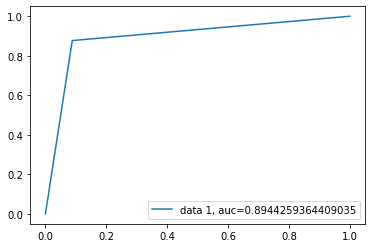

In [469]:
# I will import matplotlib.pyplot and set my fpr, tpr, _ equal to the metrics.roc_curve
# for the y_test, yhat probability 
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
auc = metrics.roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

As seen above we see that the accuracy of the ROC curve for Disneyland California has a accuracy curve at 89.44%

## Split Disney_Data into training and test sets for Disneyland_HongKong

In [470]:
# Now I will separate the Target and Predictor Variables
Target = ['Review_update']
Predict= ['Disneyland_HongKong']

X=Disney_Data[Target].values
Y=Disney_Data[Predict].values

# Next I will split my data into a training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.2, random_state=0)

In [472]:
# Next I will view the shape for my training and test sets
# and check my test and training sets for my target review_update variable
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34108, 1)
(8528, 1)
(34108, 1)
(8528, 1)


## TFIDF Vectorization to the training set data for Disneyland HongKong

In [473]:
# Next I will create the TfidfVectorizer feature wih the x_train
Hong_Park_tfidfs = TfidfVectorizer()
Hong_x_train_vector = Hong_Park_tfidfs.fit_transform(x_train.ravel())

In [474]:
# I will now pull the shape of my train
Hong_x_train_vector.shape

(34108, 32862)

In [476]:
# Next I will view my TfidfVectorizer feature for the x_train
Hong_x_train_vector

<34108x32862 sparse matrix of type '<class 'numpy.float64'>'
	with 1761854 stored elements in Compressed Sparse Row format>

In [477]:
# Next I will check the dimensions of the data
print("n_samples: %d, n_features: %d" % Hong_x_train_vector.shape)

n_samples: 34108, n_features: 32862


In [478]:
# I will use .toarray to view the array
Hong_x_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## FIT TFIDF Vectorization to Test Set for Disneyland HongKong

In [479]:
# Next I will apply the the transform to the test data set
x_Hong_vector = Hong_Park_tfidfs.transform(x_test.ravel())

In [480]:
# Next I will use .toarray to see the array 
x_Hong_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [481]:
# Next I will view the shape of my x_test_vector
x_Hong_vector.shape

(8528, 32862)

## Train a logistic regression using the training data for Disneyland HongKong

In [482]:
from sklearn.linear_model import LogisticRegression
# Initialize a logistic regression model 
logistic_hong = LogisticRegression()
# Train the model
logistic_hong = logistic.fit(Hong_x_train_vector, y_train)

In [483]:
# Next I will print the score of the model
print(logistic_hong.score(Hong_x_train_vector, y_train))

0.937668582150815


As seen above the logistic sore for the taining data for Disneyland Hong Kong has a high score of 93.76%

## Model accuracy on test set for Disneyland HongKong

In [505]:
# I will use logistic to predict the x_Hong_vector 
hong_yhat = logistic.predict(x_Hong_vector)
# Then I will use metrics to find the accuracy_score for the y_test and hong_yhat
print("Hong Kong Accuracy:",metrics.accuracy_score(y_test, hong_yhat))

ValueError: X has 32862 features per sample; expecting 32817

As seen above we can see that the accuracy of the logistic prediction for Disneyland Hong Kong is 92.64%

## Confusion matrix for the test set predictions for Disneyland HongKong

In [485]:
Confusion_matrix_Hong = confusion_matrix(y_test, hong_yhat)
print(Confusion_matrix_Hong)

[[6516   90]
 [ 537 1385]]


As seen above the confusion matrix for Disneyland California has 6516 negative reviews and 90 for the true class and 1385 negative and 537 positive review for predicted.

## Precision, recall, and F1-score for the test set predictions for Disneyland HongKong

In [486]:
# I will import classification_report and use my yhat to pull the 
# classification_report with the hong_yhat
print(classification_report(y_test, hong_yhat))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6606
           1       0.94      0.72      0.82      1922

    accuracy                           0.93      8528
   macro avg       0.93      0.85      0.88      8528
weighted avg       0.93      0.93      0.92      8528



As seen above we can see the accuracy, macro avg, and weighted avg for the precision, recall, f1-score, support for 0 and 1. As we see 0 has the highest recall at 0.99 and 1 had the highest at 0.94 for precision.

## ROC curve for the test set for Disneyland HongKong

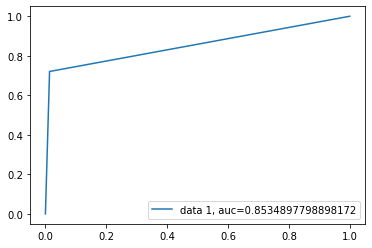

In [487]:
# I will import matplotlib.pyplot and set my fpr, tpr, _ equal to the metrics.roc_curve
# for the y_test, hong_yhat probability 
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, hong_yhat)
auc = metrics.roc_auc_score(y_test, hong_yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

As seen above we see that the accuracy of the ROC curve for Disneyland HongKong has a accuracy curve at 85.34%

## Split Disney_Data into training and test sets for Disneyland Paris

In [488]:
# Now I will separate the Target and Predictor Variables
Target = ['Review_update']
Predict= ['Disneyland_Paris']

X=Disney_Data[Target].values
Y=Disney_Data[Predict].values

# Next I will split my data into a training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=.2, random_state=0)

In [489]:
# Next I will view the shape for my training and test sets
# and check my test and training sets for my target review_update variable
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34108, 1)
(8528, 1)
(34108, 1)
(8528, 1)


## TFIDF Vectorization to the training set data for Disneyland Paris

In [490]:
# Next I will create the TfidfVectorizer feature wih the x_train
Paris_Park_tfidfs = TfidfVectorizer()
Paris_x_train_vector = Paris_Park_tfidfs.fit_transform(x_train.ravel())

In [491]:
# I will now pull the shape of my train
Paris_x_train_vector.shape

(34108, 32817)

In [492]:
# Next I will view my TfidfVectorizer feature for the x_train
Paris_x_train_vector

<34108x32817 sparse matrix of type '<class 'numpy.float64'>'
	with 1767680 stored elements in Compressed Sparse Row format>

In [493]:
# Next I will check the dimensions of the data
print("n_samples: %d, n_features: %d" % Paris_x_train_vector.shape)

n_samples: 34108, n_features: 32817


In [494]:
# I will use .toarray to view the array
Paris_x_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## FIT TFIDF Vectorization to Test Set for Disneyland Paris

In [495]:
# Next I will apply the the transform to the test data set
x_Paris_vector = Paris_Park_tfidfs.transform(x_test.ravel())

In [496]:
# Next I will use .toarray to see the array 
x_Paris_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [497]:
# Next I will view the shape of my x_test_vector
x_Paris_vector.shape

(8528, 32817)

## Train a logistic regression using the training data for Disneyland Paris

In [498]:
# Initialize a logistic regression model 
logistic_Paris = LogisticRegression()
# Train the model
logistic_Paris = logistic.fit(Paris_x_train_vector, y_train)

In [499]:
# Next I will print the score of the model
print(logistic_Paris.score(Paris_x_train_vector, y_train))

0.9201653571009734


As seen above the logistic sore for the taining data for Disneyland Paris has a high score of 92.01%

## Model accuracy on test set for Disneyland Paris

In [501]:
# I will use logistic to predict the x_Paris_vector 
Paris_yhat = logistic.predict(x_Paris_vector)
# Then I will use metrics to find the accuracy_score for the y_test and Paris_yhat
print("Paris Accuracy:",metrics.accuracy_score(y_test, Paris_yhat))

Paris Accuracy: 0.900562851782364


As seen above we can see that the accuracy of the logistic prediction for Disneyland Paris is 90.05%

## Confusion matrix for the test set predictions for Disneyland Paris

In [502]:
Confusion_matrix_Paris = confusion_matrix(y_test, Paris_yhat)
print(Confusion_matrix_Paris)

[[5551  251]
 [ 597 2129]]


As seen above the confusion matrix for Disneyland California has 5551 negative reviews and 251 for the true class and 2129 negative and 597 positive review for predicted.

## Precision, recall, and F1-score for the test set predictions for Disneyland Paris

In [503]:
# I will import classification_report and use my yhat to pull the 
# classification_report with the Paris_yhat
print(classification_report(y_test, Paris_yhat))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5802
           1       0.89      0.78      0.83      2726

    accuracy                           0.90      8528
   macro avg       0.90      0.87      0.88      8528
weighted avg       0.90      0.90      0.90      8528



As seen above we can see the accuracy, macro avg, and weighted avg for the precision, recall, f1-score, support for 0 and 1. As we see 0 has the highest recall at 0.96 and 1 had the highest at 0.89 for precision.

## ROC curve for the test set for Disneyland Paris

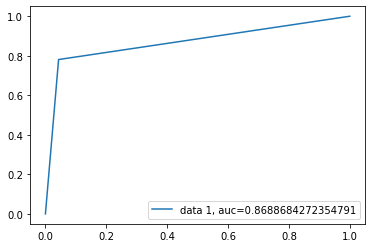

In [504]:
# I will import matplotlib.pyplot and set my fpr, tpr, _ equal to the metrics.roc_curve
# for the y_test, Paris_yhat probability 
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, Paris_yhat)
auc = metrics.roc_auc_score(y_test, Paris_yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

As seen above we see that the accuracy of the ROC curve for Disneyland Paris has a accuracy curve at 86.88%

## Conclusion

    When building my models, I decided to start with a TFIDF Vectorization on my updated reviews variable and my Polarity review rating that I calculated. When calculating this I started with a Random Forest Analysis for my training set and found that the accuracy to be very high such as 99.87% which is great. As I went on, I created a Decision Tree Analysis and found my accuracy to be a little less falling in at 99.51%. Last I decided to create a logistic regression and pulled a score of 88.75 which was even lower for the Polarity review rating. With the highest accuracy model, I found for my updated reviews variable and my Polarity review rating was from Random Forest Analysis which was 99.87%. 
	I also decided to create three different splits for each park and the updated reviews that started with a TFIDF Vectorization and set the training data in a logistic regression that told me that Hong Kong had the highest accuracy at 93.76% then Paris at 92.01% and last California with 91.93% accuracy. Next, I pulled the model accuracy for the test set for each park and found that the highest accuracy was from Hong Kong again at 92.64% then Paris as 90.02% and California in last again at 89.59%. Following that I created a Confusion matrix for each park and found that the true class for Hong Kong had the highest negative reviews coming in at 6,516 while California had the lowest true negative reviews at 4238. On another note, on the predicted side, we saw that the highest positive reviews came from Paris at 597 and the lowest positive was California at 477 predicted. A classification report ran on all three parks and found the highest recall score at Hong Kong coming in at 0.99 for negative reviews while the highest precision came from Hong Kong as well at 0.94 for positive reviews. Last the ROC curve told us that the accuracy of each park was in the upper 80% with California being the highest at 89.44%. Overall, I felt these models showed a lot and wasn’t what I was expecting as we learned that Hong Kong had the highest accuracy in most of our models. While our ROC curve showed California to be the most accurate. 
